In [2]:
#import neccessary packages

import DBconn.db_connection as db_connection
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


Connection to MySQL DB successful


## Data wrangling
### merging tables and removing unneccessary columns 


In [3]:
conn = db_connection.conn

##merge neccessary tables
avalanche_summary = pd.read_sql_query(
    "SELECT * FROM incident_summary_nonfatal", conn
)

avalanche_data = pd.read_sql_query(
    "SELECT * FROM avalanches_nonfatal", conn
)

avalanche_merge = pd.merge(
    avalanche_summary, avalanche_data, how="inner", on="id", suffixes=("", "_right")
)

# drop duplicate date column
avalanche_merge = avalanche_merge.loc[:, ~
                                      avalanche_merge.columns.str.endswith("_right")]

avalanche_merge = avalanche_merge.drop(columns=["description", "id", 'activity', 'activity_clean', 'injury', 'involvement', 'location',
                                       'fatality',
                                                'num_avalanche', 'weak_layer_date', 'locat_desc', 'province', 'elev', 'coord'])


C:\Users\Admin\AppData\Local\Temp\ipykernel_9840\1696096144.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avalanche_summary = pd.read_sql_query(
C:\Users\Admin\AppData\Local\Temp\ipykernel_9840\1696096144.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avalanche_data = pd.read_sql_query(


### Breakdown of avalanche characteristics 
# Shows histogram of some of the characteristics  of avalanches like run lenght, start angle, size etc. 

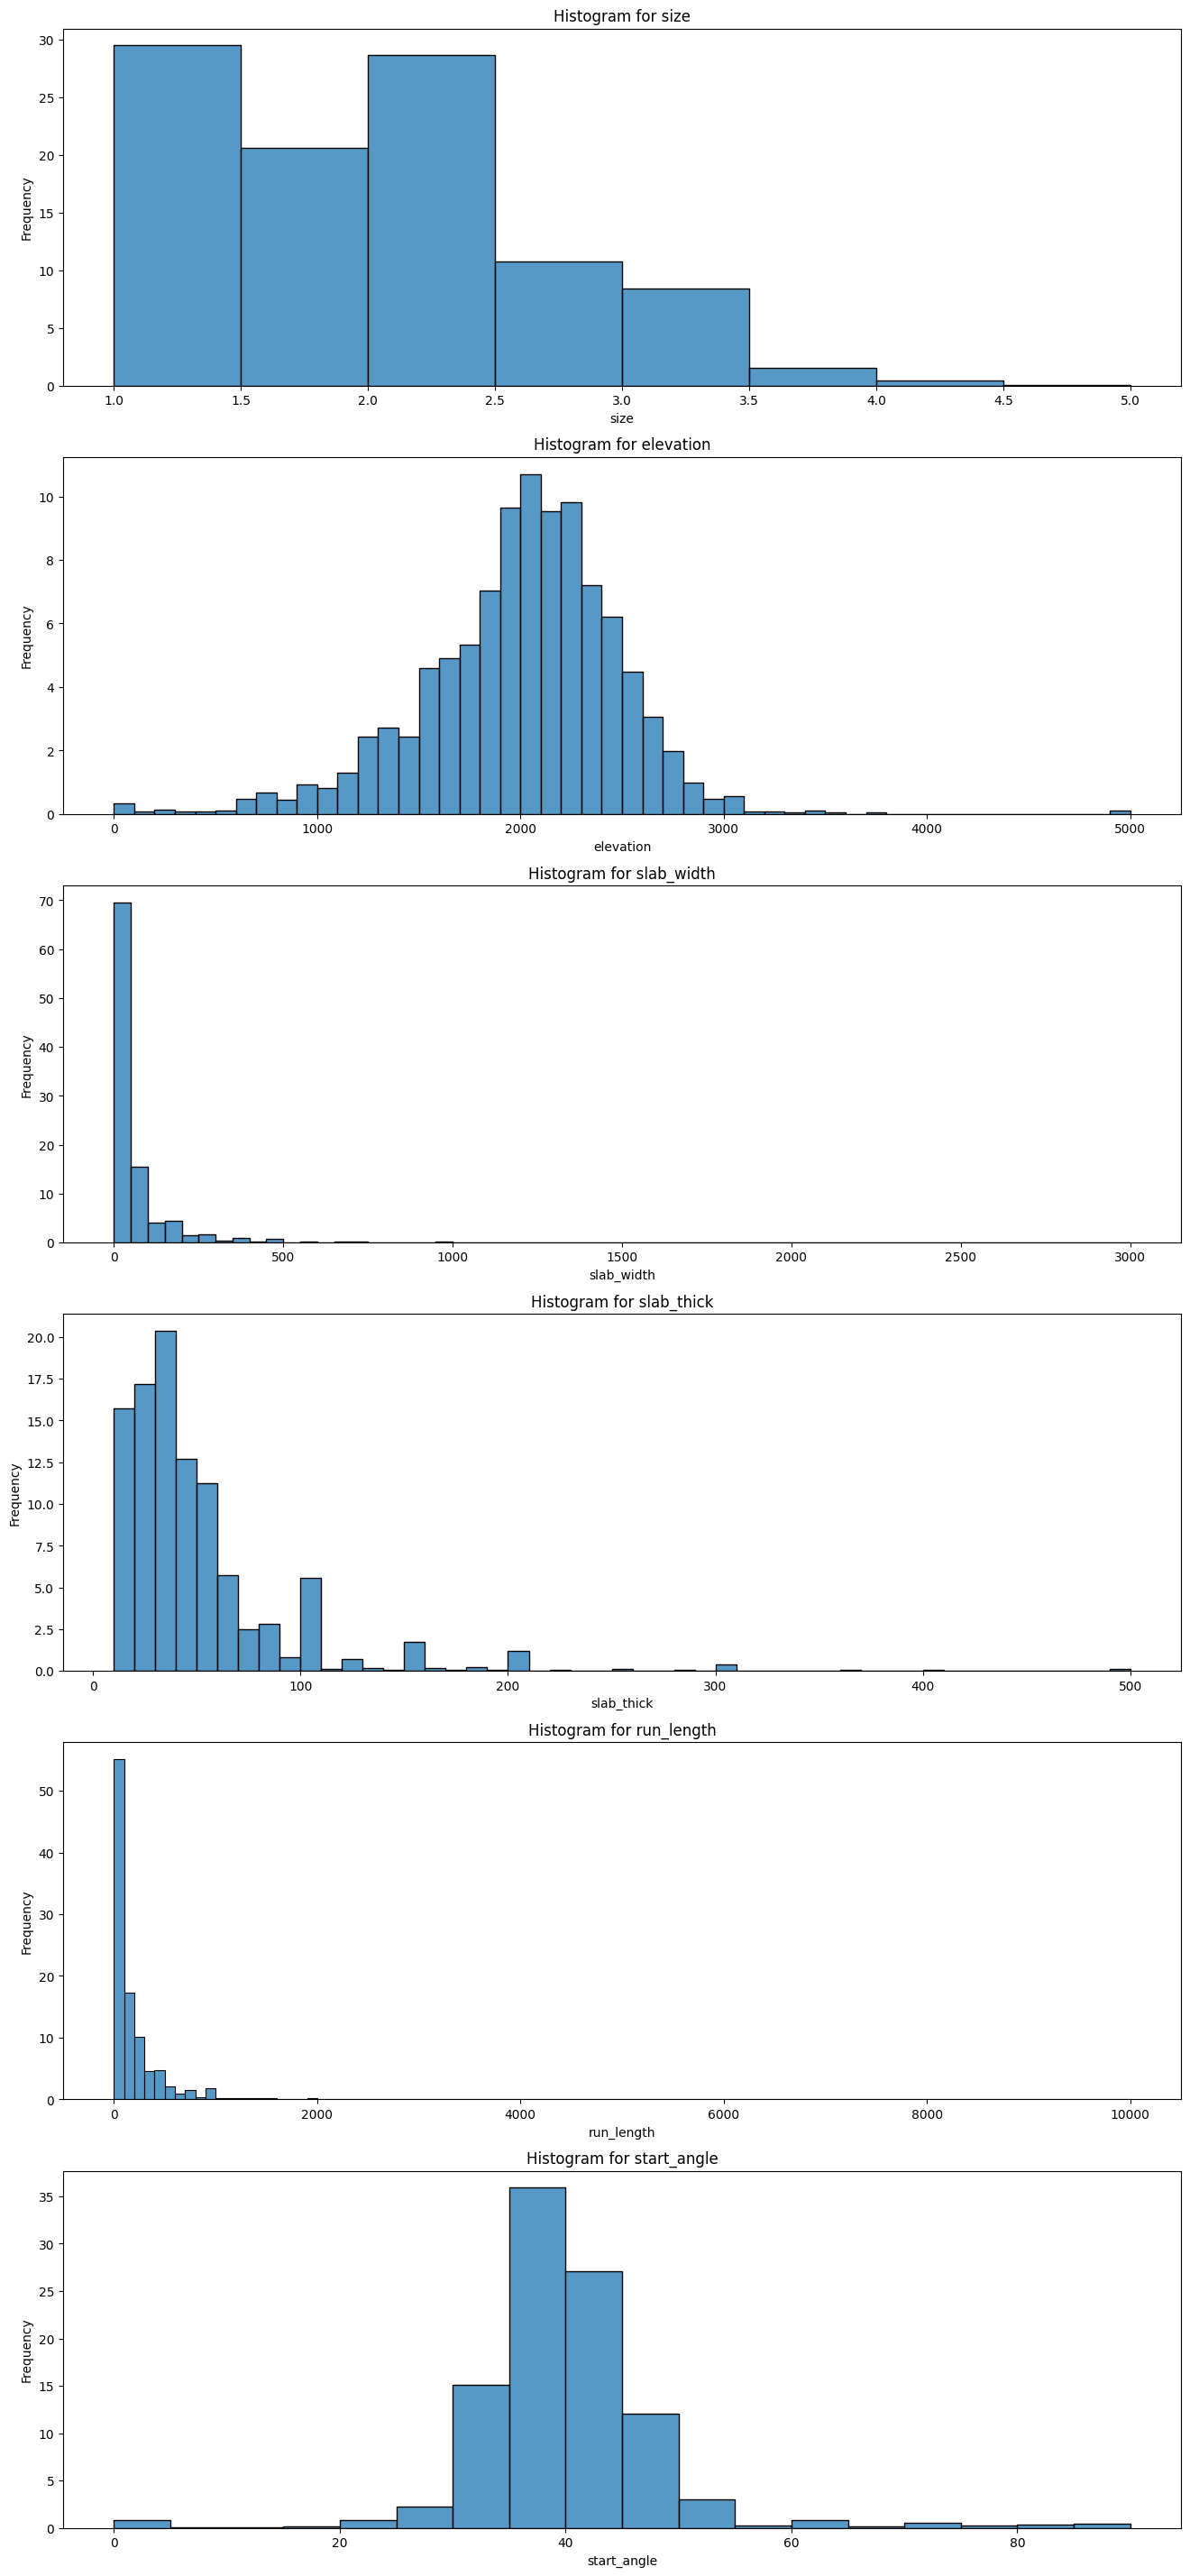

In [4]:
numeric_columns = avalanche_merge.select_dtypes(include=["number"]).columns

bin_widths = {
    'size': 0.5,
    'start_angle': 5,
    'run_length': 100,
    'elevation': 100,
    'slab_width': 50,
    'slab_thick': 10}

fig, axes = plt.subplots(nrows=len(numeric_columns),
                         ncols=1, figsize=(16, 6 * len(numeric_columns)))

# Plot each numeric column in a separate subplot
for i, column in enumerate(numeric_columns):
    data = avalanche_merge[column].dropna()
    iqr = np.percentile(data, 75) - np.percentile(data, 25) 
    bin_width = 2 * iqr / np.cbrt(len(data))  
    bins = int((data.max() - data.min()) / bin_width) 
    
   
    
    
    sns.histplot(data=avalanche_merge, x=column, stat="percent",binwidth= bin_widths[column], ax=axes[i])
    axes[i].set_title(f"Histogram for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.show()

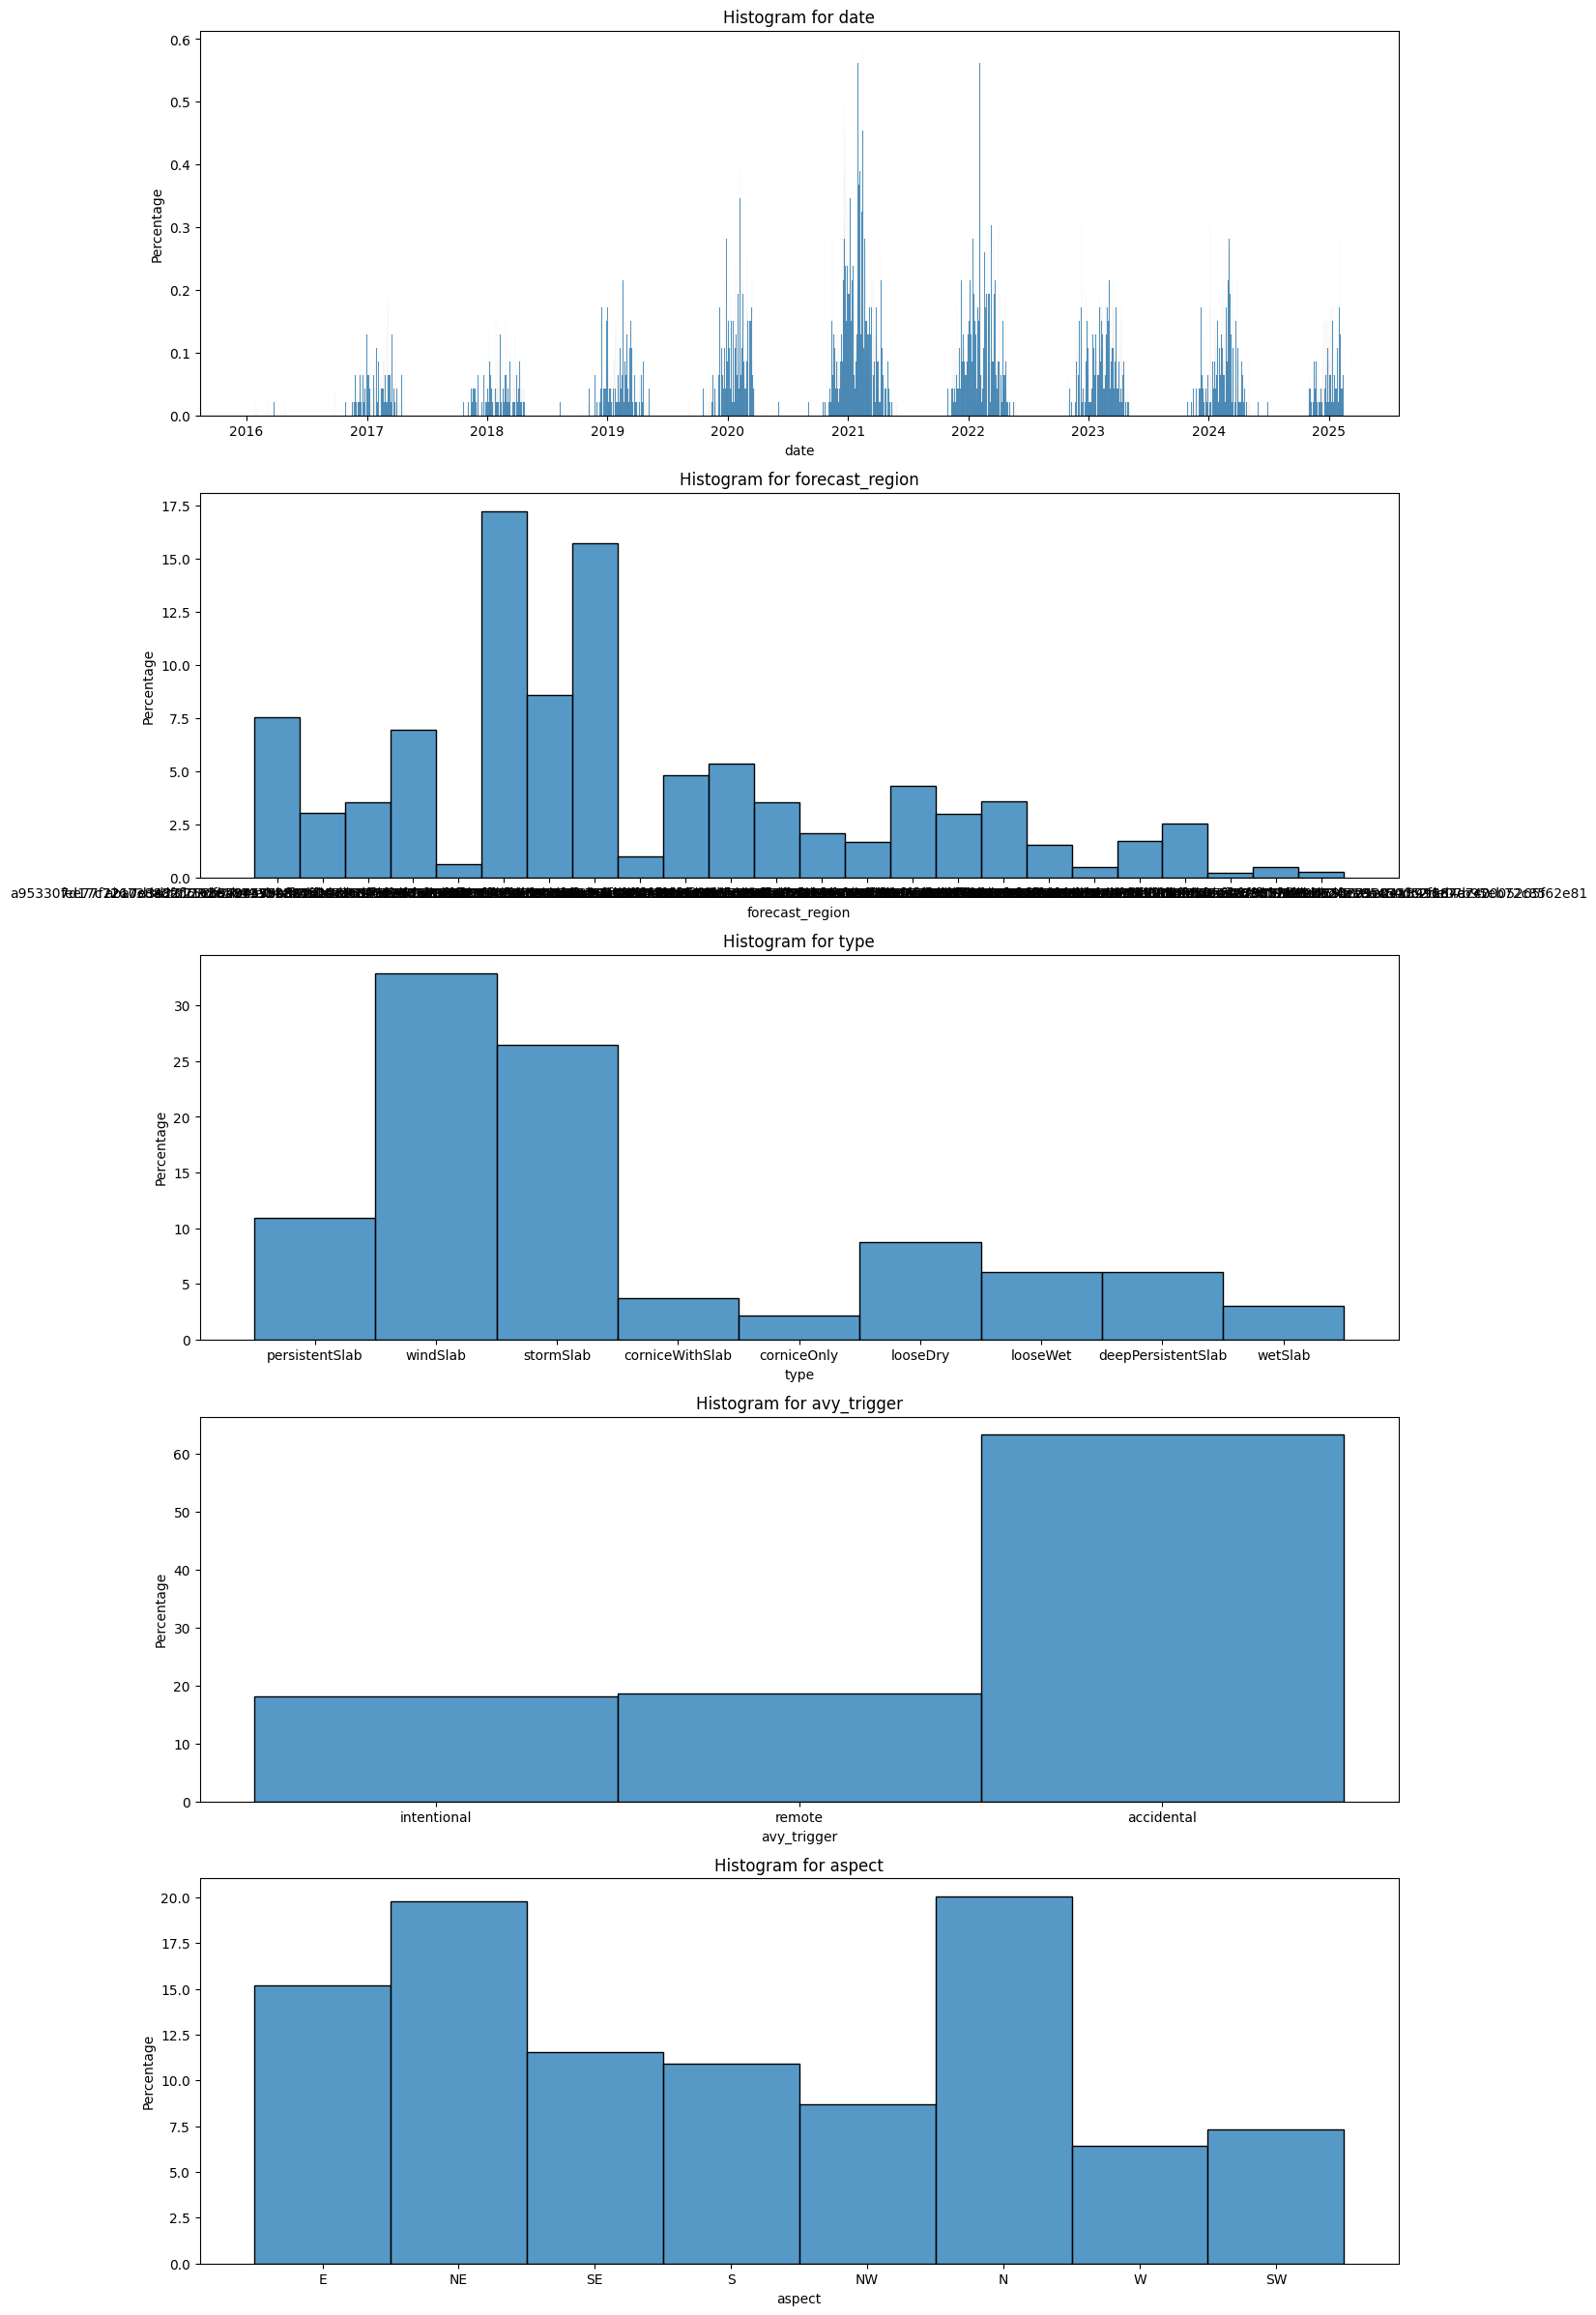

In [5]:
numeric_columns = avalanche_merge.select_dtypes(include=["object","category"]).columns

fig, axes = plt.subplots(nrows=len(numeric_columns),
                         ncols=1, figsize=(16, 6 * len(numeric_columns)))

# Plot each numeric column in a separate subplot
for i, column in enumerate(numeric_columns):
    sns.histplot(data=avalanche_merge, x=column, ax=axes[i], stat = 'percent')
    axes[i].set_title(f"Histogram for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Percentage")

# Adjust layout
plt.show()